In [2]:
import pandas as pd 
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [3]:
df = pd.read_excel("./zomato.xlsx")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [7]:
df.shape

(51717, 17)

In [8]:
df.drop_duplicates(inplace= True)
df.shape

(51717, 17)

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df = df.drop(['url','menu_item', 'phone','address'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


# Data cleaning in Name column

In [11]:
df['name'].iloc[10] 

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [12]:
df['name'].iloc[566] 

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [13]:
import re

def clean_name(names):
    if isinstance(names,str):
        if re.findall(r"[a-zA-Z0-9]",names):
            str1 = re.findall(r"[a-zA-Z0-9]",names)
            str2 = "".join(str1)
            return str2
        else:
            return names

In [14]:
df['name'] = df['name'].apply(clean_name)

In [15]:
df['name'].iloc[566]

'CafDownTheAlley'

In [16]:
df['name'].iloc[10]

'CafDownTheAlley'

# Remove "NEW",'-' and '/5' in RATE column

In [17]:
def clean_rates(rates):
    if(rates=="NEW" or rates=="-"):
        return np.nan
    else:
        rates_sp = float(str(rates).split("/")[0])
        return rates_sp

In [18]:
df['rate']=df['rate'].apply(clean_rates)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [19]:
df.rate.isnull().sum()

10052

# now  need to drop all null values which is present in columns


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51703 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  float64
 10  reviews_list                 51717 non-null  object 
 11  listed_in(type)              51717 non-null  object 
 12  listed_in(city)              51717 non-null  object 
dtypes: float64(2), i

In [21]:
df.dropna(inplace=True)

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,SpiceElephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,SanChurroCafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,AddhuriUdupiBhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,GrandVillage,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


# Rename the columns name

In [23]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
df.rename(columns ={'approx_cost(for two people)' : 'Costof2', 'listed_in(type)' : 'Type', 'listed_in(city)' : 'City'},inplace = True)

In [25]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'Costof2', 'reviews_list',
       'Type', 'City'],
      dtype='object')

# Club the values columns(rest_type,location,cuisines)

In [26]:
rest_type = df['rest_type'].value_counts()
rest_type

Casual Dining                7317
Quick Bites                  5253
Cafe                         2375
Dessert Parlor               1083
Casual Dining, Bar            985
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [27]:
new_list = rest_type[rest_type < 1000]

In [28]:
new_list

Casual Dining, Bar           985
Delivery                     704
Bar                          358
Takeaway, Delivery           342
Bar, Casual Dining           336
                            ... 
Bar, Pub                       5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: rest_type, Length: 69, dtype: int64

In [29]:
def new_rest_type(value):
    if value in new_list:
        return 'others'
    else:
        return value 

In [30]:
df['rest_type'] = df['rest_type'].apply(new_rest_type)

In [31]:
df['rest_type'].value_counts()

Casual Dining     7317
others            7217
Quick Bites       5253
Cafe              2375
Dessert Parlor    1083
Name: rest_type, dtype: int64

In [32]:
location = df['location'].value_counts()
location

Koramangala 5th Block    1776
BTM                      1474
Indiranagar              1355
HSR                      1170
Jayanagar                1054
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: location, Length: 88, dtype: int64

In [33]:
new_location = location[location < 1000]
new_location

JP Nagar                 993
Whitefield               832
Koramangala 7th Block    736
Koramangala 6th Block    728
Marathahalli             681
                        ... 
Yelahanka                  2
Kanakapura Road            2
West Bangalore             2
Rajarajeshwari Nagar       2
KR Puram                   1
Name: location, Length: 83, dtype: int64

In [34]:
def new_club_location(value):
    if value in new_location:
        return 'others'
    else:
        return value 

In [35]:
df['location'] = df['location'].apply(new_club_location)

In [36]:
df['location'].value_counts()

others                   16416
Koramangala 5th Block     1776
BTM                       1474
Indiranagar               1355
HSR                       1170
Jayanagar                 1054
Name: location, dtype: int64

In [37]:
cuisines = df['cuisines'].value_counts()
cuisines

North Indian                                   1152
North Indian, Chinese                           768
South Indian                                    366
Cafe                                            285
South Indian, North Indian, Chinese             233
                                               ... 
Biryani, North Indian, Rolls                      1
Ice Cream, Desserts, Juices                       1
North Indian, Chinese, South Indian, Juices       1
Momos, Street Food, Rolls                         1
Thai, Chinese, Momos                              1
Name: cuisines, Length: 1681, dtype: int64

# Avreage cost of approx two ppl

In [38]:
df['Costof2']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51705    1200.0
51707    2000.0
51708    1200.0
51711     800.0
51715    2500.0
Name: Costof2, Length: 23245, dtype: float64

In [39]:
df['Costof2'].mean()

753.4691331469134

# Avg rating for each  Restauranent 

In [40]:
df[['name','rate']]

,name,rate
0,Jalsa,4.1
1,SpiceElephant,4.1
2,SanChurroCafe,3.8
3,AddhuriUdupiBhojana,3.7
4,GrandVillage,3.8
...,...,...
51705,IzakayaGastroPub,3.8
51707,MBarBengaluruMarriottHotelWhitefield,3.9
51708,KeysCafeKeysHotel,2.8
51711,Bhagini,2.5


In [41]:
grp_by_name = df.groupby('name')

In [42]:
grp_by_name[['name', 'rate']].mean()

C:\Users\.g\AppData\Local\Temp\ipykernel_16904\865124801.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_by_name[['name', 'rate']].mean()


,rate
name,
1000BC,3.200000
100C,3.700000
1131BarKitchen,4.500000
12thMainGrandMercure,4.100000
1441Pizzeria,4.100000
...,...
eatfit,4.418182
iBarTheParkBangalore,3.800000
nutree,4.314286


In [43]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [44]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Costof2,reviews_list,Type,City
0,Jalsa,Yes,Yes,4.1,775,others,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,SpiceElephant,Yes,No,4.1,787,others,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,SanChurroCafe,Yes,No,3.8,918,others,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,AddhuriUdupiBhojana,No,No,3.7,88,others,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,GrandVillage,No,No,3.8,166,others,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


# Taking online orders not not allow to book the table

In [45]:
online_orders = df[(df['online_order'] == 'Yes') & (df['book_table'] == 'No')]

In [46]:
online_orders.value_counts()

name                          online_order  book_table  rate  votes  location     rest_type      dish_liked                                                                                                 cuisines                                 Costof2  reviews_list                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [47]:
orders = df[(df['online_order'] == 'Yes') & (df['book_table'] == 'Yes')]

In [48]:
orders.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Costof2,reviews_list,Type,City
0,Jalsa,Yes,Yes,4.1,775,others,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,others,others,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari
11,CafeShuffle,Yes,Yes,4.2,150,others,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600.0,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",Cafes,Banashankari
12,TheCoffeeShack,Yes,Yes,4.2,164,others,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500.0,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",Cafes,Banashankari
44,Onesta,Yes,Yes,4.6,2556,others,others,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",Delivery,Banashankari


# Highest  & lowest vote restaurent 

In [49]:
grp_by_name= df.groupby('name')

In [50]:
top_vote_rest = grp_by_name.sum().sort_values('votes', ascending = False).head()

C:\Users\.g\AppData\Local\Temp\ipykernel_16904\2518083542.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_vote_rest = grp_by_name.sum().sort_values('votes', ascending = False).head()


In [51]:
top_vote_rest

,rate,votes,Costof2
name,,,
Onesta,374.9,347520,51000.0
Truffles,197.6,301059,38700.0
EmpireRestaurant,270.9,229574,47050.0
Hammered,203.5,180602,56200.0
TheBlackPearl,85.1,172122,25700.0


In [52]:
lowest_votes= grp_by_name.sum().sort_values('votes', ascending = False).tail()

C:\Users\.g\AppData\Local\Temp\ipykernel_16904\2591813877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lowest_votes= grp_by_name.sum().sort_values('votes', ascending = False).tail()


In [53]:
lowest_votes

,rate,votes,Costof2
name,,,
BiryaniRooheKhaas,4.2,30,500.0
OmNomThai,3.9,30,400.0
36thCrossCoffeeMane,3.7,29,500.0
FatChefBiryaniWale,3.3,28,400.0
Nourich,3.9,0,800.0


# How many type of restauranets are present

In [54]:
df['Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [55]:
gp_type = df.groupby('Type')

In [56]:
res = gp_type.count()
res['name']

Type
Buffet                  750
Cafes                  1066
Delivery              10659
Desserts               1364
Dine-out               8004
Drinks & nightlife      879
Pubs and bars           523
Name: name, dtype: int64

# online order facilty location wise

In [57]:
online_facility = df.groupby(['location','online_order'])['name'].count()

In [58]:
online_facility

location               online_order
BTM                    No                264
                       Yes              1210
HSR                    No                155
                       Yes              1015
Indiranagar            No                398
                       Yes               957
Jayanagar              No                209
                       Yes               845
Koramangala 5th Block  No                547
                       Yes              1229
others                 No               5285
                       Yes             11131
Name: name, dtype: int64

# Types of Restaurant basis on rate

In [59]:
df['rest_type'].unique()

array(['Casual Dining', 'others', 'Quick Bites', 'Cafe', 'Dessert Parlor'],
      dtype=object)

In [60]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [61]:
# Define the restaurant types based on ratings
high_rating_threshold = 4.0

df['rest_type'] = df['rate'].apply(lambda x: 'High Rated' if x >= high_rating_threshold else 'Low Rated')

In [62]:
restaurant_types = df['rest_type'].value_counts()
restaurant_types

High Rated    11906
Low Rated     11339
Name: rest_type, dtype: int64

# Grouping types of restaurent on the basis of location

In [63]:
gp_rest_location = df.groupby(['location','Type'])['name'].count()
gp_rest_location 

location               Type              
BTM                    Buffet                  18
                       Cafes                   36
                       Delivery               899
                       Desserts                52
                       Dine-out               454
                       Drinks & nightlife       9
                       Pubs and bars            6
HSR                    Buffet                  16
                       Cafes                   36
                       Delivery               764
                       Desserts                55
                       Dine-out               273
                       Drinks & nightlife      12
                       Pubs and bars           14
Indiranagar            Buffet                  36
                       Cafes                   83
                       Delivery               673
                       Desserts                91
                       Dine-out               356
        

# No of votes location wise 

In [64]:
df1 = df[['location','votes']]
df1.drop_duplicates()

,location,votes
0,others,775
1,others,787
2,others,918
3,others,88
4,others,166
...,...,...
51072,others,908
51080,others,2382
51089,others,1003
51123,others,843


In [65]:
res = df1.groupby(['location'])['votes'].sum()
res

location
BTM                       501353
HSR                       474107
Indiranagar              1162207
Jayanagar                 451292
Koramangala 5th Block    2203951
others                   9267236
Name: votes, dtype: int64

# Top cusinies

In [66]:
cuisine= df[['cuisines','votes']]
cuisine.drop_duplicates()

,cuisines,votes
0,"North Indian, Mughlai, Chinese",775
1,"Chinese, North Indian, Thai",787
2,"Cafe, Mexican, Italian",918
3,"South Indian, North Indian",88
4,"North Indian, Rajasthani",166
...,...,...
51611,"Chinese, Momos",73
51615,"Biryani, Andhra",134
51620,"Thai, Chinese, Momos",182
51628,"North Indian, Continental, Asian",411


In [67]:
res = cuisine.groupby(['cuisines'])['votes'].sum()
res

cuisines
African, Burger                                                       5036
African, Burger, Desserts, Beverages, Fast Food                       1190
American                                                               590
American, Asian, Continental, North Indian, South Indian, Chinese     3920
American, Asian, European, North Indian                              30950
                                                                     ...  
Turkish, Desserts                                                      734
Turkish, Rolls                                                        1609
Vietnamese                                                           26849
Vietnamese, Salad                                                     5871
Vietnamese, Thai, Burmese, Japanese                                   3146
Name: votes, Length: 1681, dtype: int64

## Top Restuarant in Bangluru

Text(0.5, 0, 'Numer of outlets')

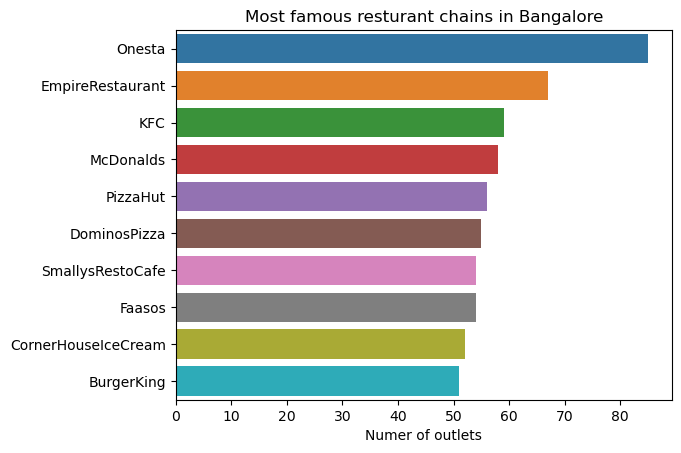

In [68]:
chains = df['name'].value_counts()[0:10]
sns.barplot(x=chains,y=chains.index)
plt.title('Most famous resturant chains in Bangalore')
plt.xlabel('Numer of outlets')

## How many Restaurants do not accept Online Orders

In [6]:
x=df['online_order'].value_counts()

In [7]:
x=px.pie(df,names='online_order')
x.show()

## Most Popular Restaurants

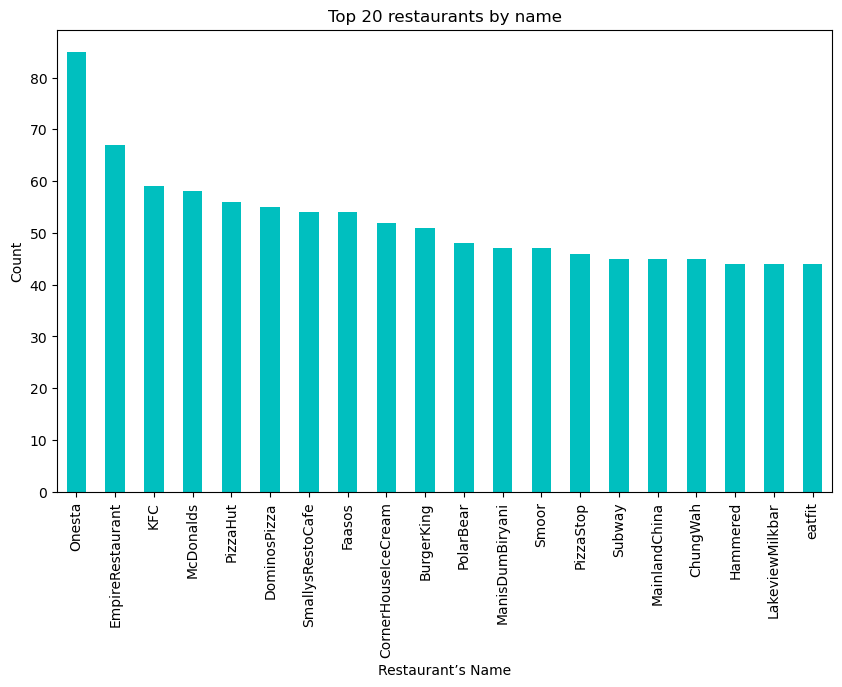

In [76]:
top_20=df.name.value_counts()[:20]
plt.figure(figsize=(10,6))
ax=top_20.plot(kind='bar',color='c')
plt.title('Top 20 restaurants by name')
plt.xlabel("Restaurant’s Name")
plt.ylabel('Count')
plt.show()